In [23]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities

In [36]:
ruta = 'road-euroroad.edges'

datos = pd.read_csv(ruta,
            skiprows = 2,
            header = None,
            sep = ' ')

datos.columns = ['from', 'to']

G = nx.from_pandas_edgelist(datos, 'from', 'to')

In [37]:
diccionario = nx.clustering(G)

diccionario

{1: 0,
 2: 0,
 3: 0,
 17: 0,
 4: 0,
 5: 0,
 855: 0,
 6: 0,
 7: 0,
 880: 0,
 8: 0.1,
 22: 0,
 23: 0,
 411: 0,
 453: 0.1,
 454: 0,
 889: 0,
 9: 0.2,
 479: 0.16666666666666666,
 480: 0,
 561: 0.2,
 10: 0.16666666666666666,
 537: 0,
 1074: 0,
 11: 0,
 536: 0,
 12: 0,
 560: 0,
 13: 0,
 27: 0,
 30: 0,
 559: 0,
 14: 0,
 596: 0,
 1138: 0,
 34: 0,
 15: 0,
 16: 0,
 18: 0,
 19: 0,
 823: 0,
 20: 0,
 388: 0,
 389: 0,
 627: 0,
 21: 0,
 409: 0,
 885: 0,
 24: 0,
 538: 0,
 1078: 0,
 1109: 0,
 25: 0,
 1110: 0,
 26: 0,
 28: 0,
 29: 0,
 31: 0,
 32: 0,
 33: 0,
 1159: 0,
 35: 0,
 36: 0,
 392: 0,
 37: 0,
 631: 0,
 38: 0,
 628: 0,
 863: 0,
 1011: 0,
 39: 0.03571428571428571,
 40: 0,
 412: 0,
 413: 0.16666666666666666,
 875: 0,
 876: 0.16666666666666666,
 881: 0,
 41: 0,
 42: 0,
 43: 0.047619047619047616,
 882: 0,
 44: 0,
 50: 0.3333333333333333,
 51: 0.1,
 455: 0,
 45: 0,
 46: 0,
 888: 0,
 47: 0,
 485: 0,
 1036: 0,
 48: 0,
 73: 0,
 486: 0,
 890: 0,
 49: 0.16666666666666666,
 74: 0,
 629: 0.16666666666666666,


In [38]:
clus = np.array([ diccionario[i] for i in G ])

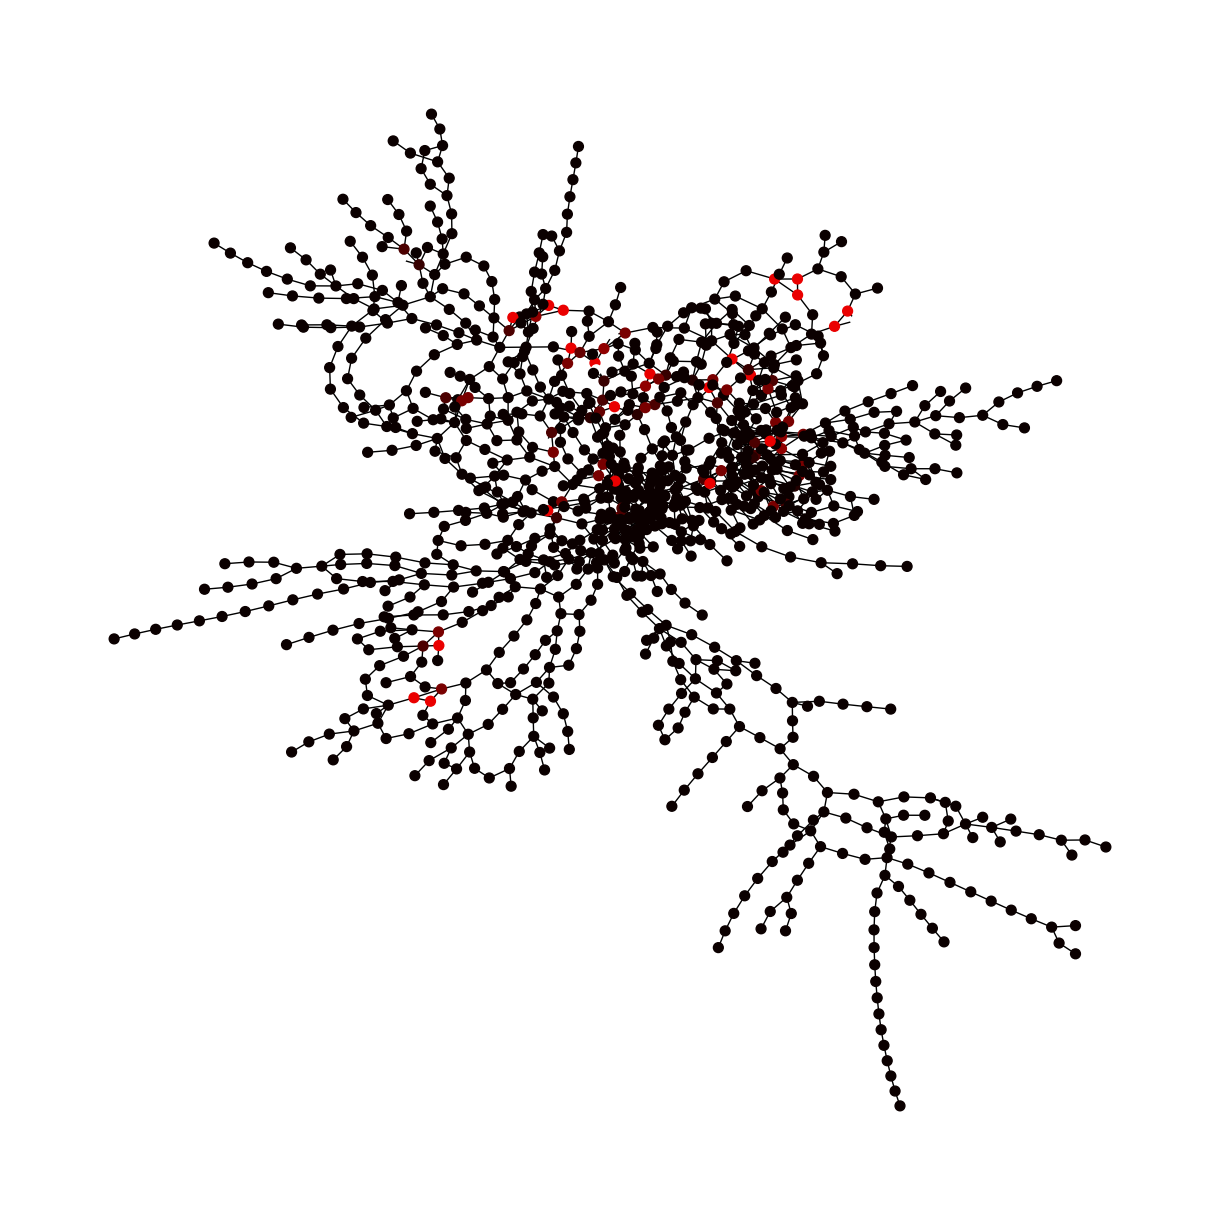

In [49]:
plt.figure(figsize = [12,12])
nx.draw_kamada_kawai(G,
                     node_color = clus,
                     node_size = 50,
                     cmap = 'hot')

In [66]:
G = nx.from_pandas_edgelist(datos, 'from', 'to')
G.remove_edges_from(nx.selfloop_edges(G))

# Buscamos las cliques más grandes
for c in nx.find_cliques(G):
    if len(c) == 2:
        print(c)

# En este caso la clique más grande es de 3 nodos

[1, 2]
[2, 17]
[2, 3]
[3, 4]
[4, 5]
[4, 855]
[6, 880]
[6, 7]
[7, 453]
[7, 454]
[7, 8]
[7, 22]
[7, 23]
[7, 889]
[7, 411]
[8, 480]
[8, 479]
[9, 537]
[9, 1074]
[10, 536]
[10, 11]
[11, 560]
[11, 12]
[12, 27]
[12, 13]
[12, 30]
[12, 559]
[13, 1138]
[13, 596]
[13, 14]
[14, 34]
[15, 16]
[16, 17]
[17, 18]
[18, 19]
[18, 823]
[19, 388]
[19, 627]
[19, 20]
[19, 389]
[20, 21]
[22, 409]
[22, 885]
[23, 1109]
[23, 1078]
[23, 24]
[23, 537]
[23, 538]
[24, 25]
[24, 1110]
[25, 26]
[26, 27]
[27, 561]
[27, 28]
[28, 29]
[29, 30]
[30, 31]
[31, 32]
[32, 33]
[33, 34]
[34, 1159]
[35, 392]
[35, 36]
[36, 37]
[36, 631]
[37, 1011]
[37, 628]
[37, 38]
[37, 863]
[38, 39]
[39, 40]
[39, 875]
[39, 881]
[39, 628]
[39, 412]
[40, 41]
[41, 42]
[42, 881]
[42, 882]
[42, 43]
[42, 876]
[43, 454]
[43, 455]
[43, 44]
[43, 411]
[44, 45]
[45, 888]
[45, 46]
[46, 889]
[46, 1036]
[46, 485]
[46, 47]
[47, 48]
[47, 73]
[47, 890]
[47, 486]
[48, 49]
[48, 74]
[49, 485]
[51, 538]
[51, 52]
[51, 901]
[52, 53]
[53, 629]
[53, 54]
[54, 540]
[54, 55]


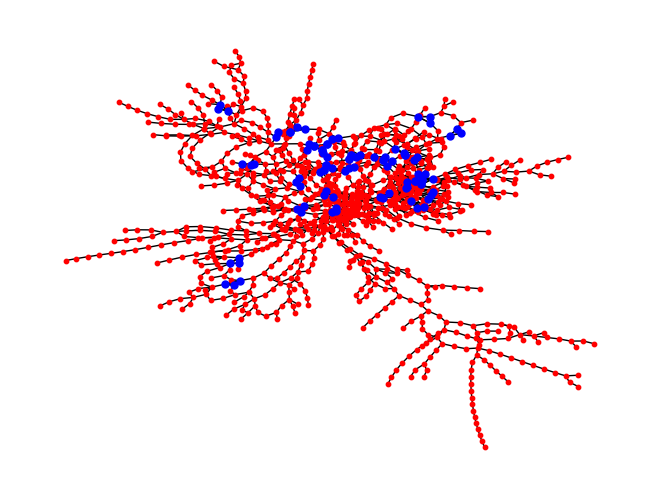

In [57]:
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, node_size=10, node_color='red')
for c in nx.find_cliques(G):
    if len(c) == 3:
        nx.draw(nx.subgraph(G,c), pos = pos, with_labels=False, node_size=25, node_color='blue')

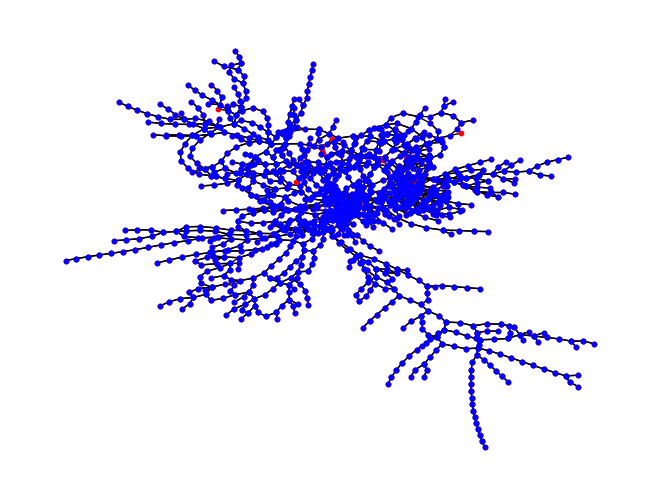

In [68]:
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, node_size=10, node_color='red')
for c in nx.find_cliques(G):
    if len(c) == 2:
        nx.draw(nx.subgraph(G,c), pos = pos, with_labels=False, node_size=10, node_color='blue')